In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import chardet

# Function to detect encoding of a file
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# File path
file_path = "spam.csv"

# Detect encoding
encoding = detect_encoding(file_path)

# Read CSV with detected encoding
df = pd.read_csv(file_path, encoding=encoding)

# Now df contains your DataFrame



In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2675,ham,I'm sick !! I'm needy !! I want you !! *pouts*...,NaN,NaN,NaN
3004,ham,Ew are you one of them?,NaN,NaN,NaN
5137,spam,YOU VE WON! Your 4* Costa Del Sol Holiday or å...,NaN,NaN,NaN
4225,ham,"Ok thats cool. Its , just off either raglan rd...",NaN,NaN,NaN
1022,ham,We still on for tonight?,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3587,ham,If you were/are free i can give. Otherwise nal...
4246,spam,Text PASS to 69669 to collect your polyphonic ...
3345,ham,U're welcome... Caught u using broken english ...
2286,ham,I have had two more letters from . I will copy...
5462,spam,Txt: CALL to No: 86888 & claim your reward of ...


In [8]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2142,ham,You see the requirements please
2828,spam,Send a logo 2 ur lover - 2 names joined by a h...
5332,ham,I think steyn surely get one wicket:)
168,ham,Great escape. I fancy the bridge but needs her...
1264,ham,I will see in half an hour


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# 2. EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

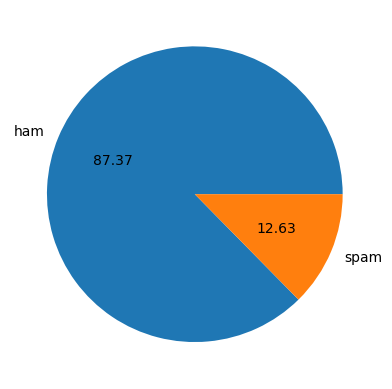

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'] , autopct="%0.2f")
plt.show()

In [20]:
import nltk

In [21]:
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shravni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters']=df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words']=df['text'].apply(lambda x:len (nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentenses']=df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentenses
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentenses']].describe()

,num_characters,num_words,num_sentenses
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target']==0][['num_characters','num_words','num_sentenses']].describe()

,num_characters,num_words,num_sentenses
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target']==1][['num_characters','num_words','num_sentenses']].describe()

,num_characters,num_words,num_sentenses
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:

import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

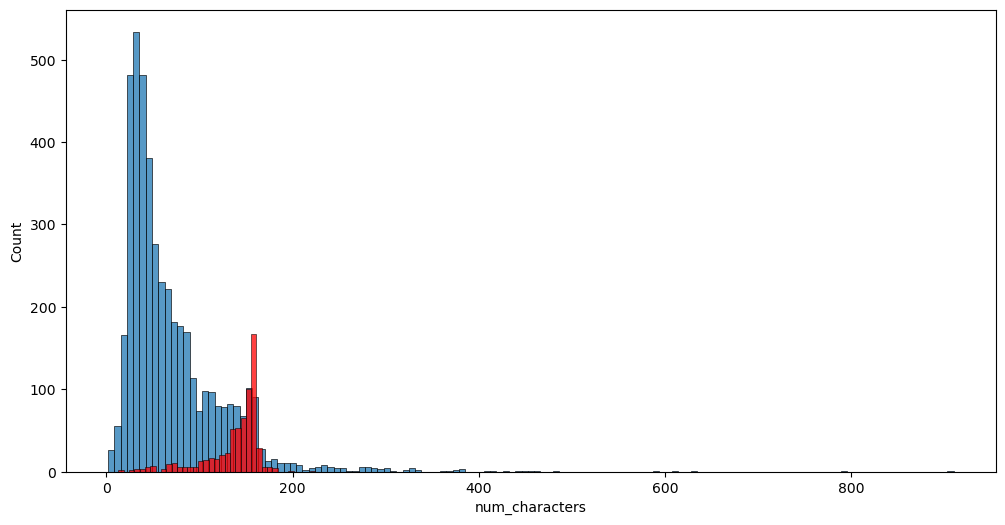

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

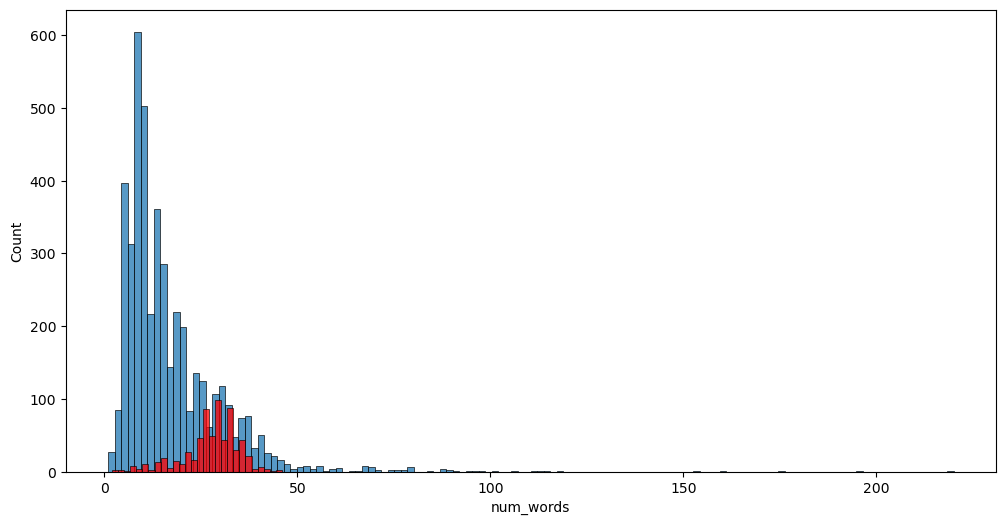

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\Shravni\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


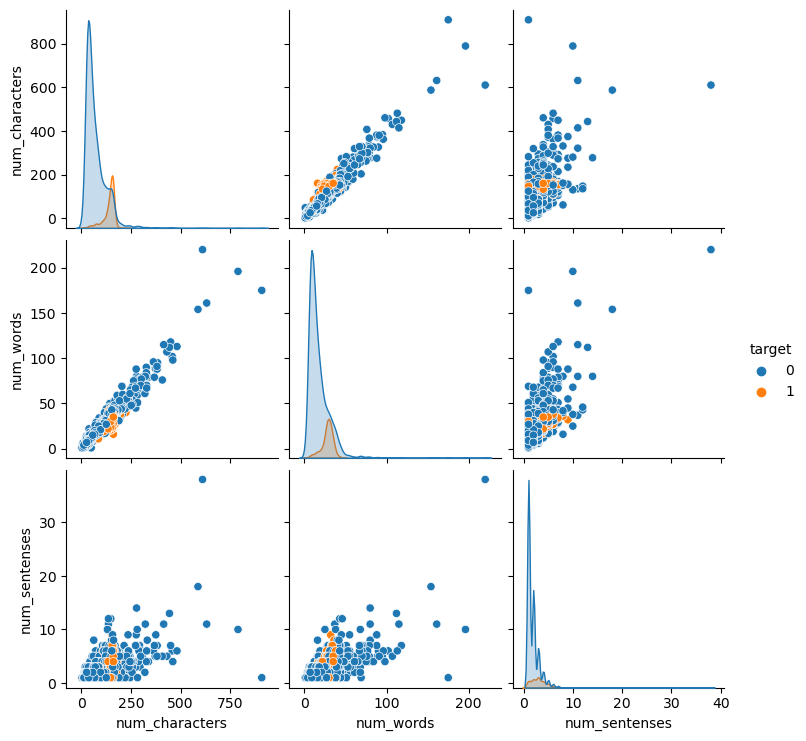

In [35]:
sns.pairplot(df,hue='target')


In [37]:
#  import seaborn as sns
#  sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing

In [38]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shravni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [41]:
def transform_text(text):
    text=text.lower()   #step 1 lower case
    text=nltk.word_tokenize(text)  #step 2 tokenization
    
    y=[]
    for i in text:        
        if i.isalnum():    #step 3 removing special characters and punctuation
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: #step 4 removing stop words
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i)) #step 4 stemming
    
    return " ".join(y)


In [42]:
transform_text("I am loving the music")

'love music'

In [43]:
df['transformed_text']=df['text'].apply(transform_text)

In [44]:
df.sample(5)

,target,text,num_characters,num_words,num_sentenses,transformed_text
2689,0,"Ya ok, vikky vl c witin &lt;#&gt; mins and il...",56,20,1,ya ok vikki vl c witin lt gt min il repli u
4541,1,FreeMsg Hi baby wow just got a new cam moby. W...,143,35,3,freemsg hi babi wow got new cam mobi wan na c ...
1183,0,Am i that much bad to avoid like this?,38,10,1,much bad avoid like
3715,0,Networking technical support associate.,39,5,1,network technic support associ
5462,1,Txt: CALL to No: 86888 & claim your reward of ...,147,31,2,txt call 86888 claim reward 3 hour talk time u...


In [46]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
lst=df[df['target'] == 1]['transformed_text'].str.cat(sep="")
lst

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcvwinner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hourmobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 infourgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18xxxmobilemovieclub use credit click wap link next txt messag click httpengland v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wqthank subscript rington uk mobil charg pleas confirm repli ye repli charg07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrowsm ac sptv new jersey devil detroit red wing play i

In [49]:
len(lst.split())

9287

In [50]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep="")) 

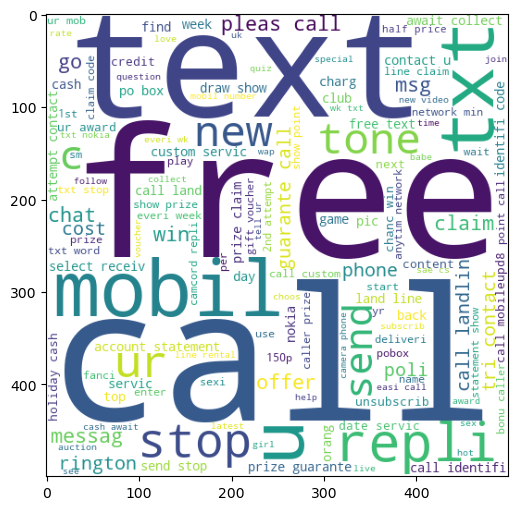

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep="")) 

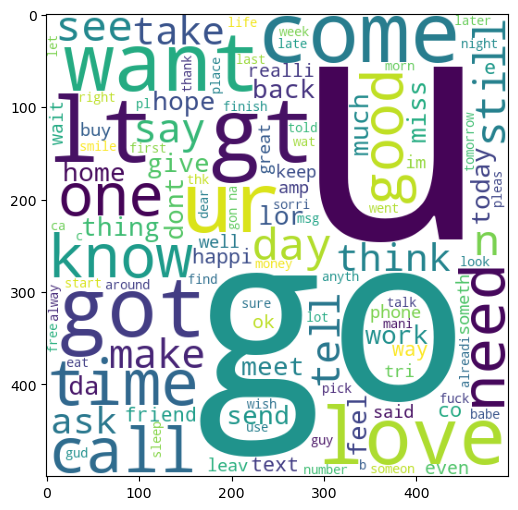

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentenses,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

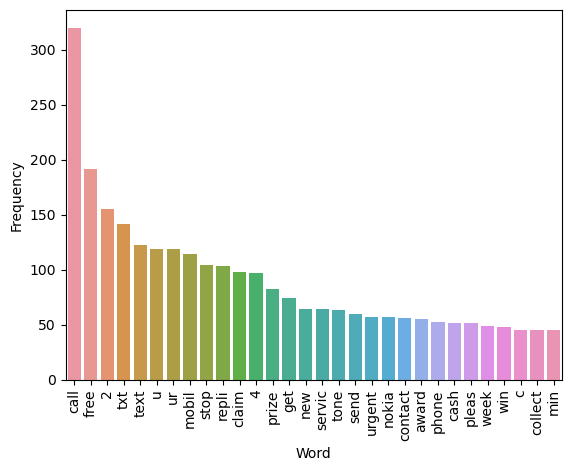

In [57]:
from collections import Counter

# Calculate word frequencies using Counter
word_counts = Counter(spam_corpus)
word_counts
# Convert the Counter object to a DataFrame
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])
word_counts_df
# Plot the barplot using Seaborn
sns.barplot(data=word_counts_df, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()


In [58]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

35404

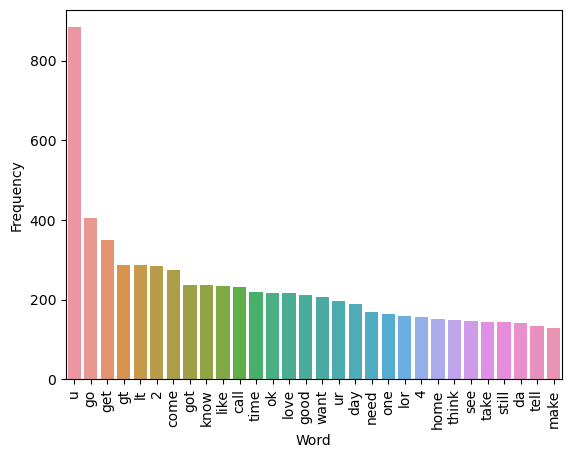

In [60]:
# Calculate word frequencies using Counter
word_counts = Counter(ham_corpus)
word_counts
# Convert the Counter object to a DataFrame
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])
word_counts_df
# Plot the barplot using Seaborn
sns.barplot(data=word_counts_df, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [61]:
df.head()

,target,text,num_characters,num_words,num_sentenses,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model building

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [63]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [64]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
y = df['target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
mnb = MultinomialNB()

In [70]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [71]:

import pickle

In [72]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))